# Confidence Interval of Model Parameter

A confidence interval is a range of values which is expected, with some quantifiable degree of confidence, to contain the value of an unknown value of interest.(Petty, 2012) For example, suppose a random sample of 100 boxes of cereal is selected from among all of the boxes filled by an automatic filling machine during a work shift. The mean weight of the 100 boxes in the sample is found to be 12.05 ounces and the standard deviation to be 0.1 ounces. Using the procedures to be described in the next section, we can calculate an interval [12.0304, 12.0696] for the mean weight of all boxes filled at the station and associate a confidence level of 0.95 (95%) with that interval.1 We call the calculated interval [12.0304, 12.0696], together with its associated confidence level, a confidence interval.

Here, we use a simple regression model to get the confidence interval and hopefully to complement what professor taught by the boostrapping method.

In [2]:
from pandas import DataFrame
import statsmodels.api as sm
import numpy as np
from scipy import stats
from scipy.stats import linregress
import matplotlib.pyplot as plt

Linear regression is used as a predictive model that assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate) and the independent variable/s (input variable/s used in the prediction).

For example, you may use linear regression to predict the price of the stock market (your dependent variable) based on the following Macroeconomics input variables:

Interest Rate
Unemployment Rate

Under Simple Linear Regression, only one independent/input variable is used to predict the dependent variable. It has the following structure:

Y = C + M*X

Y = Dependent variable (output/outcome/prediction/estimation)
C = Constant (Y-Intercept)
M = Slope of the regression line (the effect that X has on Y)
X = Independent variable (input variable used in the prediction of Y)

In [3]:
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Thu, 04 Apr 2019   Prob (F-statistic):           4.04e-11
Time:                        22:15:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

We can see from the table above, there are three model parameters, they are constant term, Interest_Rate, Unemployment_Rate with the coefficient 1798.4040, 345.5401, -250.1466 and the 95% confidence interval is [-71.685, 3668.493]

const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)

We can also find the confidence interval by the boostraping method as in the lecture note.

In [4]:
print(df.shape)

(24, 5)


In [5]:
df.sample(df.shape[0], replace=True).head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
13,2016,11,1.75,5.9,965
19,2016,5,1.75,6.1,866
6,2017,6,2.50,5.5,1234
20,2016,4,1.75,5.9,876
2,2017,10,2.50,5.3,1357


In [6]:
bootstrap_intercepts = []
bootstrap_slopes = []

for i in range(50000):
    sample_indexes = np.random.choice(df.index, size=len(df.index))
    bootstrap_sample = df.iloc[sample_indexes]
    lr = linregress(bootstrap_sample["Unemployment_Rate"], bootstrap_sample["Stock_Index_Price"])    
    bootstrap_intercepts.append(round(lr.intercept, 3))
    bootstrap_slopes.append(round(lr.slope,3))

    
bootstrap_intercepts[:10], bootstrap_slopes[:10]

([4245.56,
  4391.582,
  3962.483,
  4436.165,
  4933.981,
  5065.458,
  4615.146,
  4332.778,
  4298.42,
  4528.965],
 [-553.525,
  -577.147,
  -497.148,
  -581.031,
  -669.411,
  -691.735,
  -611.411,
  -560.432,
  -561.584,
  -601.636])

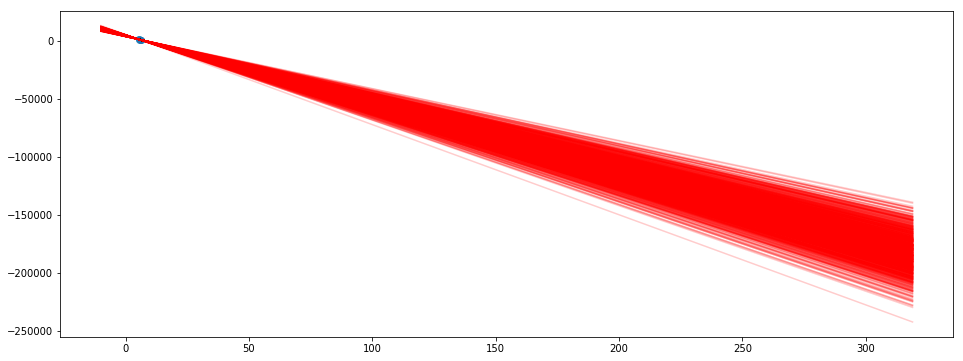

In [7]:
# why I can not get the figure here?
### which is a little bit werid

plt.figure(figsize=(16,6))

plt.scatter(df["Unemployment_Rate"], df["Stock_Index_Price"], alpha=0.2)

x_axis = np.arange(-10,320)

for i in np.random.choice(range(5000), 1000, replace=False):
    y_hat = bootstrap_intercepts[i] + bootstrap_slopes[i] * x_axis
    plt.plot(x_axis, y_hat, color='red', alpha=0.2)

[3880.512075 5060.79115 ]


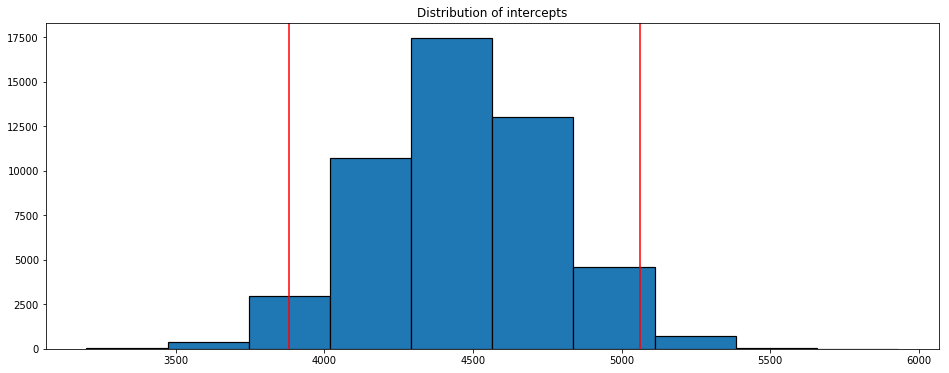

In [8]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_intercepts,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_intercepts, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")

[-693.1665   -484.815725]


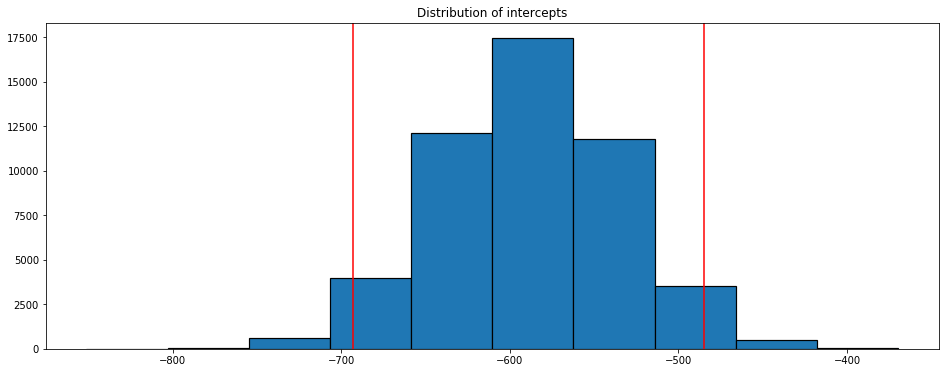

In [9]:
plt.figure(figsize=(16,6))
_ = plt.hist(bootstrap_slopes,  edgecolor='black', linewidth=1.2)
_ = plt.title("Distribution of intercepts")

con_interval = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(con_interval)
plt.axvline(con_interval[0], color="red")
plt.axvline(con_interval[1], color="red")

### Nearest Neighbor Regression

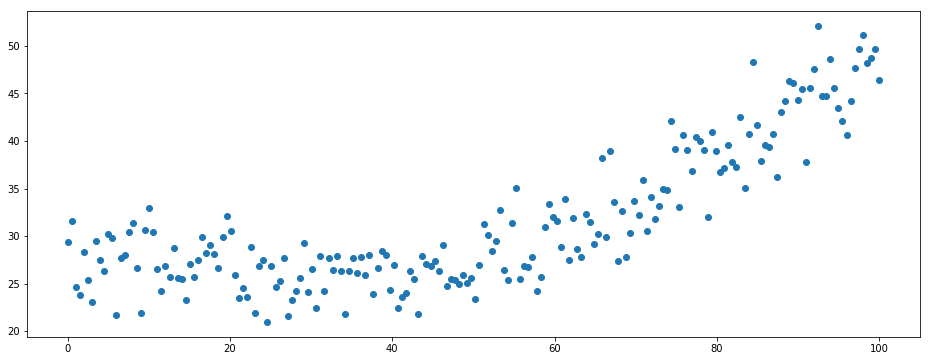

In [10]:
plt.figure(figsize=(16,6))

x = np.linspace(0,100, 200)
errors = np.random.normal(0,3, size=200)
y = 30 + (-0.3 * x)+ (0.005*x**2) +  errors
plt.scatter(x,y)

In the case that the data is non-linear, the nearest neighbors method can be used. In this method, the model is equal to the average of the $k$ nearest points, the value of $k$ determines the number of neighbors. This regression can be used in the data above because there is enough data to get a relatively accurate model. As the plot below shows, the red dots represent the neighbors closest to $x = 70$.

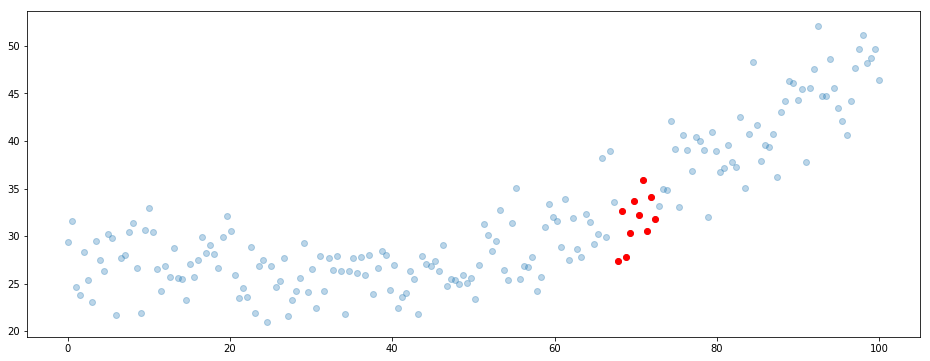

In [17]:
plt.figure(figsize=(16,6))

pos = np.searchsorted(x, 70)
neighbors = np.arange(pos-5, pos+5)

plt.scatter(x, y, alpha=0.3)
plt.scatter(x[neighbors], y[neighbors], color="red")

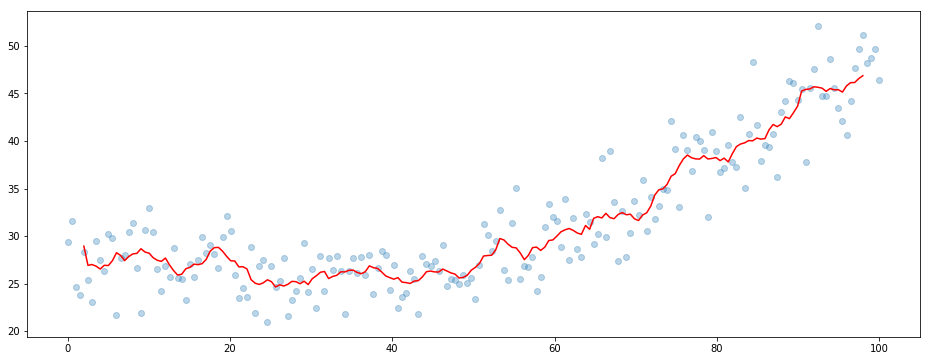

In [18]:
plt.figure(figsize=(16,6))

reg_line = []
for i in x[4:-4]:
    pos = pos = np.searchsorted(x, i)
    neighbors = np.arange(pos-5, pos+5)
    reg_line.append(y[neighbors].mean())

plt.scatter(x, y, alpha=0.3)
plt.plot(x[4:-4], reg_line, color="red") 

Taking the average the nearest neighbors of $x$ gives us the plot above, which shows a pretty accurate regression and represents the trend of the data fairly well. However, this is not always the case. There are instances where the Nearest Neighbor method is not recommended; for example, if there's too much data. This method should not be used when there are too many independent variables or predictors. Another case where it's not recommended to use this method is with high dimensional data because distances between data matters less, rendering this method useless. Lastly, the nearest neighbor method relies on the points around each $x$ point, so the value of each model $x$ point is highly affected by outliers.